In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("wine_dataset.csv")

In [4]:
# Data Understanding 

# 1. Rows and columns 
print("Rows, columns: " + str(df.shape))

# 2. First 5 rows of the wine dataset
print(df.head(n=5))


# No Missing Values 
print(df.isna().sum())

Rows, columns: (1599, 17)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  k_value  l_value  m_value  percentage_f

In [5]:
# SPLIT ...len(df)=1599 , df.shape[0] = 1599

# Return a sample (or samples) from the “standard normal” distribution.
df['split'] = np.random.randn(df.shape[0], 1)


train_part = np.random.rand(len(df)) <= 0.8     #  randomly selects 80 % of samples for training 

train = df[train_part]
test = df[~train_part]

train.to_csv('train.csv',index=False)      
test.to_csv('test.csv',index=False) 

train['quality'].to_csv('y_train.csv',index=False)
test['quality'].to_csv('y_test.csv',index=False)

In [6]:
# STEP 1
# lOAD THE DATASET
train_X = pd.read_csv("train.csv")
train_Y = pd.read_csv("y_train.csv") ##

test_X = pd.read_csv("test.csv") ##
test_Y = pd.read_csv("y_test.csv")

# DROP THE COLUMN  "quality" as it is not a parameter

train_X = train_X.drop("quality", axis = 1)
test_X = test_X.drop("quality", axis = 1)


In [7]:
# covert it into a numpy array

train_X = train_X.values
train_Y = train_Y.values
test_X = test_X.values
test_Y = test_Y.values

# Reshaping the arrays such that calculation can be done 
# parameters are taken transpose of 
# while outputs are reshaped accordingly
train_X = train_X.T
train_Y = train_Y.reshape(1, train_X.shape[1])

test_X = test_X.T
test_Y = test_Y.reshape(1, test_X.shape[1])

print("Shape of X_train : ", train_X.shape)  # 17 x sth
print("Shape of Y_train : ", train_Y.shape)  # 1 x (sth)
print("Shape of X_test : ", test_X.shape)     # 17 x (total-sth)
print("Shape of Y_test : ", test_Y.shape)      # 1 x (total-sth)

Shape of X_train :  (17, 1281)
Shape of Y_train :  (1, 1281)
Shape of X_test :  (17, 318)
Shape of Y_test :  (1, 318)


In [8]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [9]:
def cost_function(m,Y,A):
    # (error representation) 
    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
    return cost

In [10]:
def gradient_desc(m,P,X,Y):

    # Gradient Descent : Algorithm to minimise cost function
    dW = (1/m)*np.dot(P-Y, X.T)   # SHAPE OF (1xn)
    dB = (1/m)*np.sum(P - Y)

    return dW ,dB

In [11]:
def model(X, Y, learning_rate, n_iterations):
    # m = total number of observations , n = number of features
    m, n = train_X.shape[1], train_X.shape[0]
    
    B = 0
    cost_list = []
    W = np.zeros((n,1))    # (n x 1) shape -- initialise with 0's (parameter)
    
    for i in range(n_iterations):  # Training for n_iterations time
        
        Z = np.dot(W.T, X) + B   
        P = sigmoid(Z)               # probabilistic prediction of shape 1 x m
                                     # > 0.5 = 1 and < 0.5 = 0
        
        # cost function 
        cost = cost_function(m,Y,P)
        
        # Gradient Descent : Algorithm to minimise cost function
        dW , dB = gradient_desc(m,P,X,Y)       # dw is slope
        
        W = W - learning_rate*dW.T   #  transpose is to match dimensions
        B = B - learning_rate*dB     # B = B - αdB
        
        # Keeping track of our cost function value so as to plot 
        cost_list.append(cost)
        
        if(i%(n_iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [12]:
n_iterations = 200000
learning_rate = 0.0014    # after certain hit and trials this gives a decent accuracy and just fits the train model
W, B, cost_list = model(train_X, train_Y, learning_rate = learning_rate, n_iterations = n_iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  20000 iteration is :  0.5678061546835561
cost after  40000 iteration is :  0.5484407404044767
cost after  60000 iteration is :  0.5419032705618393
cost after  80000 iteration is :  0.5390738576307932
cost after  100000 iteration is :  0.537515390312053
cost after  120000 iteration is :  0.5364573151281764
cost after  140000 iteration is :  0.5356275544958932
cost after  160000 iteration is :  0.5349214335635665
cost after  180000 iteration is :  0.534295019282944


In [13]:
def accuracy(X, Y, W, B):
       
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)    

    A = A > 0.5  # A is in boolean 
    
    A = np.array(A, dtype = 'int64')   # converting into integer
    
    total_observations = Y.shape[1]
    acc = (1 - np.sum(np.absolute(A - Y))/total_observations)*100
    
    print("model accuracy is : ", acc , "%")



# Calculating the accuracy of the model on the test data set
accuracy(test_X, test_Y, W, B)

model accuracy is :  76.10062893081762 %


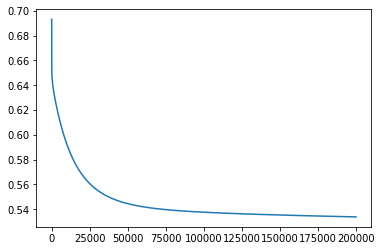

In [14]:
plt.plot(np.arange(n_iterations), cost_list)
plt.show()

# 200000,0.0015 --- 76.64, 0.53